In [1]:
%pylab inline
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


In [184]:
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

In [185]:
path = '../data/LMCMW/MW1LMC4/'
HR = 'R-tests/MW1LMC4-1_a1H6UHR_000'
MR = 'a1/MW1LMC4_a1H6HR_000'
LR = 'a1/MW1LMC4a1H6_000'

In [186]:
HR_disk = readsnap(path + HR, 'pos', 'disk')
MR_disk = readsnap(path + MR, 'pos', 'disk')
LR_disk = readsnap(path + LR, 'pos', 'disk')

HR_diskV = readsnap(path + HR, 'vel', 'disk')
MR_diskV = readsnap(path + MR, 'vel', 'disk')
LR_diskV = readsnap(path + LR, 'vel', 'disk')

HR_diskP = readsnap(path + HR, 'pot', 'disk')
MR_diskP = readsnap(path + MR, 'pot', 'disk')
LR_diskP = readsnap(path + LR, 'pot', 'disk')


print len(HR_disk)
print len(MR_disk)
print len(LR_disk)

Returning DISK  Positions
Returning DISK  Positions
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Velocities
Returning DISK  Velocities
Returning DISK  Potential
Returning DISK  Potential
Returning DISK  Potential
100000
30000
10000


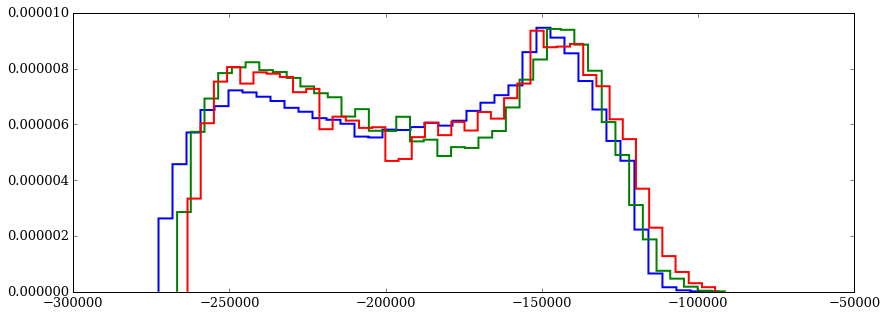

In [47]:
h = hist(HR_diskP, bins=40, histtype='step', lw=2, normed='True')
h = hist(MR_diskP, bins=40, histtype='step', lw=2, normed='True')
h = hist(LR_diskP, bins=40, histtype='step', lw=2, normed='True')

(-20.0, 40.0, -30.0, 40.0)

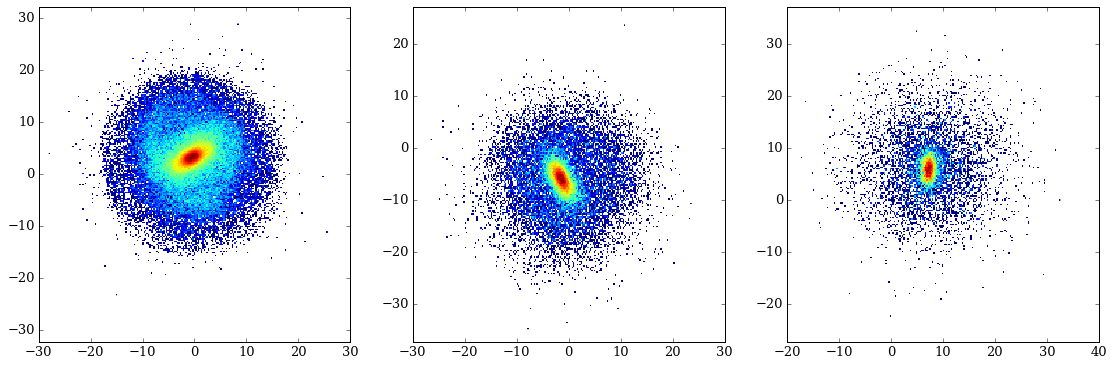

In [250]:
figsize(19, 6)
subplot(1, 3, 1)
HR = hist2d(HR_disk[:,0], HR_disk[:,1], bins=200, norm=mpl.colors.LogNorm())
axis('equal')

subplot(1, 3, 2)
MR = hist2d(MR_disk[:,0], MR_disk[:,1], bins=200, norm=mpl.colors.LogNorm())
axis('equal')

subplot(1, 3, 3)
LR = hist2d(LR_disk[:,0], LR_disk[:,1], bins=200, norm=mpl.colors.LogNorm())
axis('equal')

In [251]:
print max(HR_disk[:,2]), min(HR_disk[:,1])

7.44828 -23.2686


In [311]:
def CM_correction(x, y, z, pot):
    CM = np.where(pot == min(pot))[0]
    xc = x - x[CM]
    yc = y - y[CM]
    zc = z - z[CM]
    return xc, yc, zc
    
def rotation(x, y, dt):
    xr = x*cos(dt) + y*sin(dt)
    yr = -x*sin(dt) + y*cos(dt)
    return xr, yr

def radial_bin(x, y, z, vx, vy, vz):
    theta = pi/45.0
    bin_cut = np.where((x>0) & (arctan(abs(y/x))<theta) & (z<2) & (z>-2))[0]
    return x[bin_cut], y[bin_cut], z[bin_cut], vx[bin_cut], vy[bin_cut], vz[bin_cut]

def rotation_curve(vx, vy, vz):
    vc = np.sqrt(vx**2 + vy**2)
    return vc

In [312]:
HR_Xc, HR_Yc, HR_Zc = CM_correction(HR_disk[:,0], HR_disk[:,1], HR_disk[:,2], HR_diskP)


(-30.0, 30.0, -30.0, 30.0)

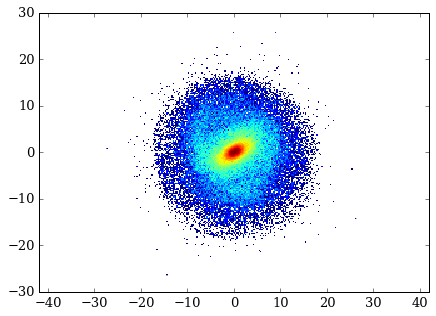

In [313]:
figsize(7, 5)
HR = hist2d(HR_Xc, HR_Yc, bins=200, norm=mpl.colors.LogNorm())
axis('equal')

In [346]:
HR_Xr1, HR_Yr1 = rotation(HR_Xc, HR_Yc, pi/6.0)


(-30.0, 30.0, -30.0, 30.0)

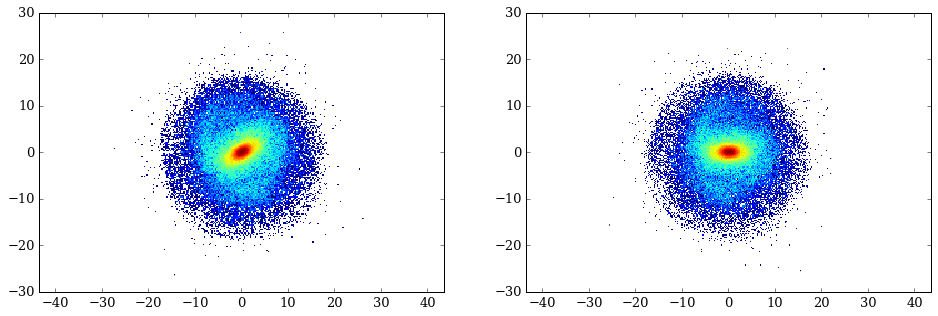

In [341]:
figsize(16, 5)
subplot(1, 2, 1)
HR = hist2d(HR_Xc, HR_Yc, bins=200, norm=mpl.colors.LogNorm())
axis('equal')

subplot(1, 2, 2)
HR = hist2d(HR_Xr, HR_Yr, bins=200, norm=mpl.colors.LogNorm())
axis('equal')

0
1
2


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in less


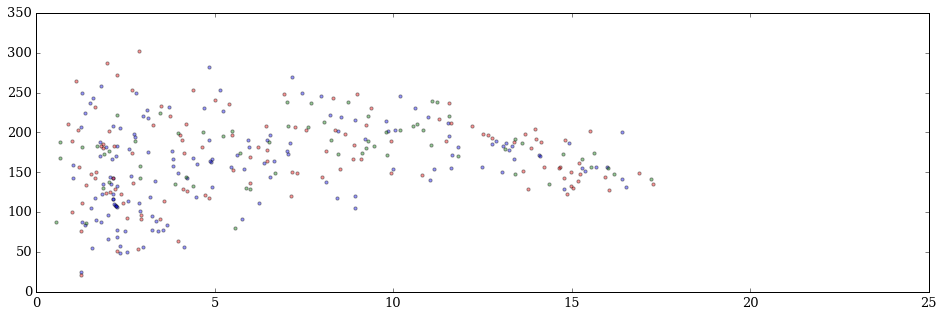

In [355]:
rot = [0, pi/4.0, pi/2.0]
colors = ['b', 'r', 'g']
for i in range(3):
    print i
    HR_Xr, HR_Yr = rotation(HR_Xr1, HR_Yr1, rot[i])
    XHRbin, YHRbin, ZHRbin, VxHRbin, VyHRbin, VzHRbin = radial_bin(HR_Xr, HR_Yr, HR_disk[:,2], HR_diskV[:,0], HR_diskV[:,1], HR_diskV[:,2])
    VcHR = rotation_curve(VxHRbin, VyHRbin, VzHRbin)
    RHR = np.sqrt(XHRbin**2 + YHRbin**2)
    scatter(RHR, VcHR,  s=10, alpha=0.4, c=colors[i])
    xlim(0, 25)

(-5.0, 20.0, -1.5, 1.0)

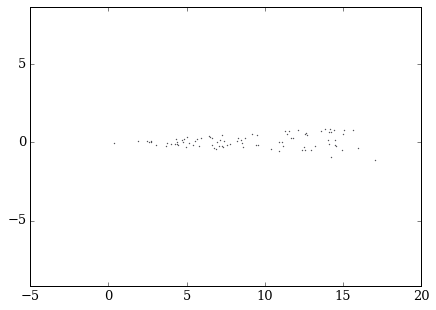

In [317]:
figsize(7, 5)
scatter(XHRbin, YHRbin, s=0.1)
axis('equal')

In [318]:
VcHR = rotation_curve(VxHRbin, VyHRbin, VzHRbin)
RHR = np.sqrt(XHRbin**2 + YHRbin**2)

(0, 25)

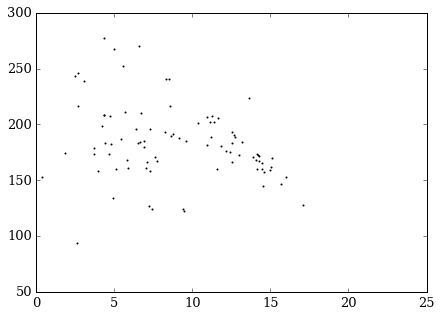

In [319]:
scatter(RHR, VcHR, s=1)
xlim(0, 25)